In [1]:
# to mount the databse by drive
from google.colab import drive
# to extract the database
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
#to work on numerics data
import numpy as np
# for performing operation on dataset
import pandas as pd
# to define the path
from pathlib import Path
import os.path
# for visualization
import matplotlib.pyplot as plt
# to show the image 
from IPython.display import Image, display
# for c_m
import matplotlib.cm as cm
# for guiding the machine 
import tensorflow as tf 

import os
# for operating system 
import shutil
from tqdm import tqdm
# basic library
from random import shuffle

import cv2
# crucial library
import glob

from tensorflow.keras import backend as K
# for randomization
import random
# for randomly selction
import albumentations as A
# for dividing the dataset
from sklearn.model_selection import train_test_split, StratifiedKFold
# implication of some layers 
from tensorflow.keras.layers import *
# importing layers of deep learning model
from tensorflow.keras.optimizers import *
# importing optimizer
from tensorflow.keras.models import *
# for preprocessing
from tensorflow.keras.preprocessing.image import *
# for callbacks initialization 
from tensorflow.keras.callbacks import *
# model
from tensorflow.keras.applications.efficientnet import *


In [3]:
flower_data=glob.glob("/content/drive/MyDrive/Rajatgupta/image_classification/NewFolder/flowers/*/*") # loading data set 

In [4]:
len(flower_data) # to check the length

4317

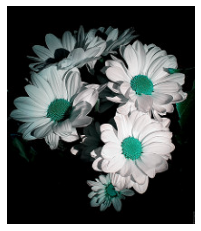

In [5]:
#showing image  
img=cv2.imread(flower_data[35]) 
# to print the image 
plt.imshow(img)
# to reduce the action of axis 
plt.axis('off') 
# to print the image
plt.show()

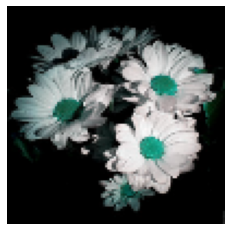

In [6]:
# to resize the image
img_resize=cv2.resize(img,(100,100))
# to display the image 
plt.imshow(img_resize,cmap="gray")
# to reduce the effect of the axis 
plt.axis('off') 
# for printing the image 
plt.show()

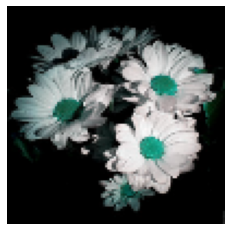

In [7]:
# for changing the background colour of the image to rgb
image_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB) 
# to display an image in a window 
plt.imshow(img_resize,cmap="gray") 
# showing image 
plt.axis('off') 
# to print the image 
plt.show()  
 

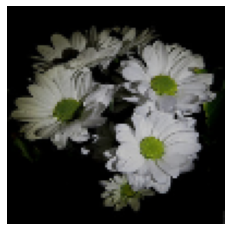

In [8]:
# initializing normalize function
image_norm = cv2.normalize(image_rgb, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
# to display an picture in a window 
plt.imshow(image_norm)
#to reduce the effect of axis
plt.axis('off')
# to print the image  
plt.show()

In [9]:
classes=flower_data[4].split(os.path.sep)[-2]   
# randomly selecting a class

In [10]:
classes 
# printing the class 

'daisy'

In [11]:
data=[] 
# creating the data variable which will contain the data 
labels=[]
# to initialize the labels
for i in tqdm (range(len(flower_data))): 
  # for selecting random picture of the database 
    try:
        img= cv2.imread(flower_data[i]) 
        # reading the  data
        img_resize=cv2.resize(img,(255,255)) 
        # resizing the image 
        image_rgb = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB) 
        # defining the color 
        image_norm = cv2.normalize(image_rgb, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
         # to normalize the data
        data.append(image_norm) 
        # for changing the picture number by one 
        classes=flower_data[i].split(os.path.sep)[-2]   
        # defining the classes 
        if classes=='daisy':  # label first
            label=0
        elif classes=='dandelion':  # label second
            label=1
        elif classes=='rose':   # label third
            label=2
        elif classes=='sunflower': # label fourth
            label=3
        elif classes=='tulip':  # label fifth
            label=4
        labels.append(label)
    except:
        continue

100%|██████████| 4317/4317 [48:04<00:00,  1.50it/s]


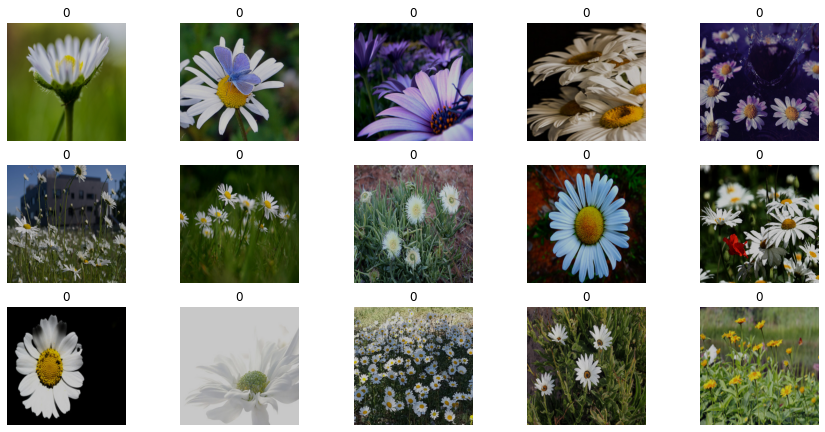

In [12]:
#showing images 
plt.figure(figsize=(15,10))
# defining the number of images range
for i in range(15):  
# defining the range 
    plt.subplot(4,5,i+1)
    # to display an image in a window
    plt.imshow(data[i],cmap ='gray')
    # to show the title 
    plt.title(labels[i])
    # to reduce the effect of axis 
    plt.axis("off")

In [13]:
# to get the size of the database
len(data) 
 

4317

In [14]:
 # to get length of the labels
len(labels) 

4317

In [15]:
data=np.array(data) 
#for conversion into an array
labels=np.array(labels) 
#for conversion into an array

In [16]:
# to get the shape 
data.shape,labels.shape

((4317, 255, 255, 3), (4317,))

In [17]:
 # dividing the data into fitting and testing
Flower_X_Train, Flower_X_Test, Flower_Y_Train, Flower_Y_Test = train_test_split(data, labels, test_size=0.200370627, random_state=1)

Flower_X_Train, Flower_X_Val, Flower_Y_Train, Flower_Y_Val = train_test_split(Flower_X_Train, Flower_Y_Train, test_size=0.125432100, random_state=1)

In [18]:
# to get the train data shape 
print(Flower_X_Train.shape,Flower_Y_Train.shape)
# to get the test data shape 
print(Flower_X_Test.shape,Flower_Y_Test.shape)
# to get the val data shape 
print(Flower_X_Val.shape,Flower_Y_Val.shape)

(3019, 255, 255, 3) (3019,)
(865, 255, 255, 3) (865,)
(433, 255, 255, 3) (433,)


In [19]:
# transforming into categories
from tensorflow.keras.utils import to_categorical, plot_model
# transforming the fit database 
Flower_Y_Train = to_categorical(Flower_Y_Train)
# transforming the test database 
Flower_Y_Test = to_categorical(Flower_Y_Test)
# transforming the validation database 
Flower_Y_Val= to_categorical(Flower_Y_Val)

In [20]:
# to get the shape of y variable
print(Flower_Y_Train.shape,Flower_Y_Test.shape,Flower_Y_Val.shape)

(3019, 5) (865, 5) (433, 5)


# **Efficient_Net **

In [21]:
!pip install -U efficientnet  
# installing efficient net model features 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.0 MB/s 


In [22]:
# to import the crucial library
from keras import applications
# importing the model
from tensorflow.keras.applications import EfficientNetB4
# importing the call backs 
from keras import callbacks
# importing required layers
from keras.models import Sequential
# importing crucial layers
from keras.layers import Flatten,BatchNormalization,MaxPooling2D

In [23]:
from keras.layers.pooling import GlobalAveragePooling2D  
# importing layers 
from keras.layers import Dense
# to import the dense layer

efficient_net = EfficientNetB4(   # initializing the model efficientnet
    weights='imagenet',
    input_shape=(255,255,3), # defining the shape 
    include_top=False,
    pooling='max'
)

Efficient_Model = Sequential()
# defining the input layer
Efficient_Model.add(efficient_net)
# adding the dense layer
Efficient_Model.add(Dense(units = 5, activation='softmax'))
# last result layer of the algorithm efficient net
Efficient_Model.summary()
# to print the summary

71696384/71686520 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 5)                 8965      
                                                                 
Total params: 17,682,788
Trainable params: 17,557,581
Non-trainable params: 125,207
_________________________________________________________________


In [24]:
# importing the optimizer and compiling the code
Efficient_Model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['Accuracy'])  # to compile the model


In [25]:
checkpoint_path = 'models/EfficientNetB4/model_224.h5'
# initializing the check point and callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    # initializing the early stop
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    # initializing checkpoint
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

In [26]:
history = Efficient_Model.fit(  #  to trained the model 
    Flower_X_Train, Flower_Y_Train,
    epochs =100,  # initializing the epochs 
    callbacks=callbacks,
    batch_size = 28,  # initializing the bs
    validation_data = (Flower_X_Val, Flower_Y_Val))

Epoch 1/100
108/108 [==============================] - ETA: 0s - loss: 0.9198 - Accuracy: 0.7943
Epoch 1: val_loss improved from inf to 0.68381, saving model to models/EfficientNetB4/model_224.h5
108/108 [==============================] - 127s 897ms/step - loss: 0.9198 - Accuracy: 0.7943 - val_loss: 0.6838 - val_Accuracy: 0.8661 - lr: 0.0010
Epoch 2/100
108/108 [==============================] - ETA: 0s - loss: 0.1748 - Accuracy: 0.9447
Epoch 2: val_loss improved from 0.68381 to 0.59466, saving model to models/EfficientNetB4/model_224.h5
108/108 [==============================] - 93s 857ms/step - loss: 0.1748 - Accuracy: 0.9447 - val_loss: 0.5947 - val_Accuracy: 0.8684 - lr: 0.0010
Epoch 3/100
108/108 [==============================] - ETA: 0s - loss: 0.1107 - Accuracy: 0.9662
Epoch 3: val_loss did not improve from 0.59466
108/108 [==============================] - 92s 848ms/step - loss: 0.1107 - Accuracy: 0.9662 - val_loss: 0.7951 - val_Accuracy: 0.8591 - lr: 0.0010
Epoch 4/100
108/10

In [27]:
# importing classsification report , confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# defining testing predict variable 
pred1 = Efficient_Model.predict(Flower_X_Test)
# defining training predict variable
pred1_T = Efficient_Model.predict(Flower_X_Train)

In [28]:
print(classification_report(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred1, axis=1))) #c_r 
print()  # testing score
print('Testing Accuracy: ', accuracy_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred1, axis=1)))
print() # training score
print('Training Accuracy: ', accuracy_score(np.argmax(Flower_Y_Train, axis=1), np.argmax(pred1_T, axis=1))) 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       143
           1       0.97      0.99      0.98       214
           2       0.91      0.96      0.93       164
           3       0.99      0.95      0.97       159
           4       0.92      0.92      0.92       185

    accuracy                           0.95       865
   macro avg       0.95      0.95      0.95       865
weighted avg       0.95      0.95      0.95       865


Testing Accuracy:  0.9502890173410404

Training Accuracy:  1.0


In [29]:
# to import basic library
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by EfficientNet of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred1, axis=1),average='micro')) 
# checking the precision value
print('Recall by EfficientNet of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred1, axis=1),average='micro')) 
# checking the recall value
print('F1 score by EfficientNet of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred1, axis=1),average='micro')) 
# checking the f2 score

Precision by EfficientNet of testing data is: 0.950
Recall by EfficientNet of testing data is: 0.950
F1 score by EfficientNet of testing data is: 0.950


In [30]:
# define color containing variable
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr', 'BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r', 'ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r', 'Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r', 'RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r', 'nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

In [31]:
# importing c_m library
from sklearn.metrics import confusion_matrix
# initializing the c_m
cm1 = confusion_matrix(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred1, axis=1))

Text(69.0, 0.5, 'Original Values')

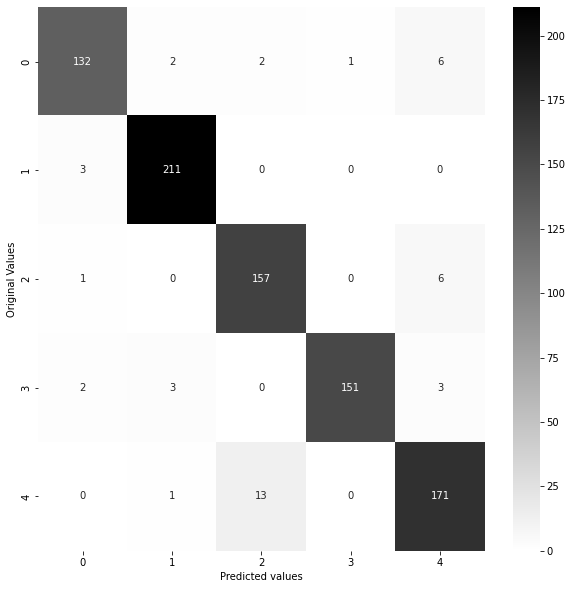

In [32]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm1,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

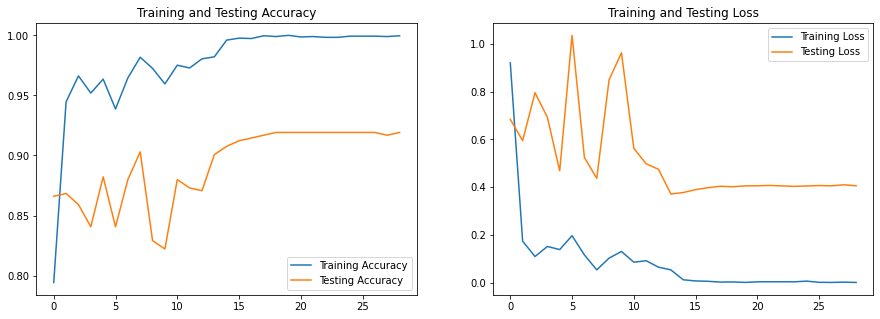

In [33]:
#to draw the score chart
acc = history.history['Accuracy']
# to add the validation score
val_acc = history.history['val_Accuracy']
# ploting the loss graph
loss = history.history['loss']
# to add the validation loss score
val_loss = history.history['val_loss']
# defining range
epochs_range = range(29)
# defining the size
plt.figure(figsize=(15, 5))
# defining the sub plot
plt.subplot(1, 2, 1)
# defining the title 
plt.plot(epochs_range, acc, label='Training Accuracy')
# range for fitting data
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
# range of resulting database
plt.legend(loc='lower right')
# giving title name 
plt.title('Training and Testing Accuracy')
plt.subplot(1, 2, 2)
# defining the subplot
plt.plot(epochs_range, loss, label='Training Loss')
# range of simple fitting loss
plt.plot(epochs_range, val_loss, label='Testing Loss')
# range of testing loss
plt.legend(loc='upper right')
# defining the title 
plt.title('Training and Testing Loss')
# to print comparison graph
plt.show()

# **Xception**

In [34]:
import tensorflow as tf
# importing the library
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# importing input layer
from tensorflow.keras.models import Sequential, save_model, load_model
# adding important layers
from tensorflow.keras.layers import Conv2D, GlobalMaxPooling2D 
# adding compact layer
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
# adding B_N

In [35]:
# initializing the model Xception
base_model = tf.keras.applications.Xception( # creating the model Xception
    include_top=False,
    weights="imagenet",
    input_shape=(255, 255, 3), # defining the shape 
    classes=5, # defining the classes
    classifier_activation="softmax",
)

83697664/83683744 [==============================] - 0s 0us/step


In [36]:
num_of_class = 5 # defining the classes


Xception_model = Sequential() 
#adding input layers 
Xception_model.add(base_model)
Xception_model.add(GlobalMaxPooling2D()) 
# adding globalmaxpooling layer
Xception_model.add(Dropout(0.5))
# adding dropout layer
Xception_model.add(Dense(128, activation='relu')) 
# adding hidden layer
Xception_model.add(Dense(64, activation='relu'))
# adding dropout layer
Xception_model.add(Dropout(0.5))   
# to add dropout layer
Xception_model.add(Flatten())    
# to add flatten layer
Xception_model.add(BatchNormalization())   
# to add normalisation layer
Xception_model.add(Dense(num_of_class, activation='softmax'))   
#adding output layer

# compiling the code 
Xception_model.compile(loss ='binary_crossentropy',
                       # initializing the loss
                     optimizer= 'Adam', 
                     # adding the optimizer
                   metrics =['accuracy'])

In [37]:
Xception_model.summary  
# summary of the model  

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2eb9e04f50>>

In [38]:
# importing crucial library
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint # defining checkpoint 
checkpoint_path = 'models/Xception/model_224.h5'
# initialization 
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

In [39]:
H = Xception_model.fit( # training the model Xception
    Flower_X_Train,
    Flower_Y_Train,
    batch_size=32,  # initializing the batch size
    callbacks =callbacks,
    epochs=100,  # defining the size of an epochs 
    validation_data=(Flower_X_Val, Flower_Y_Val)) #Model Training

Epoch 1/100
95/95 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.7410
Epoch 1: val_loss improved from inf to 0.63318, saving model to models/Xception/model_224.h5
95/95 [==============================] - 91s 867ms/step - loss: 0.4781 - accuracy: 0.7410 - val_loss: 0.6332 - val_accuracy: 0.5935 - lr: 0.0010
Epoch 2/100
95/95 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8702
Epoch 2: val_loss improved from 0.63318 to 0.37717, saving model to models/Xception/model_224.h5
95/95 [==============================] - 80s 838ms/step - loss: 0.2821 - accuracy: 0.8702 - val_loss: 0.3772 - val_accuracy: 0.6259 - lr: 0.0010
Epoch 3/100
95/95 [==============================] - ETA: 0s - loss: 0.1791 - accuracy: 0.9092
Epoch 3: val_loss improved from 0.37717 to 0.21722, saving model to models/Xception/model_224.h5
95/95 [==============================] - 79s 835ms/step - loss: 0.1791 - accuracy: 0.9092 - val_loss: 0.2172 - val_accuracy: 0.8083 - lr: 

In [40]:
# importing classsification report , confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# defining the predict function
pred2 = Xception_model.predict(Flower_X_Test)
# defining predict variable for training
pred2_T = Xception_model.predict(Flower_X_Train)

In [41]:
print(classification_report(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred2, axis=1)))  #c_r
print()  #testing SCORE
print('Testing Accuracy: ', accuracy_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred2, axis=1)))
print()   # training SCORE
print('Training Accuracy: ', accuracy_score(np.argmax(Flower_Y_Train, axis=1), np.argmax(pred2_T, axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       143
           1       0.96      0.98      0.97       214
           2       0.86      0.92      0.89       164
           3       0.97      0.94      0.96       159
           4       0.91      0.91      0.91       185

    accuracy                           0.93       865
   macro avg       0.93      0.92      0.93       865
weighted avg       0.93      0.93      0.93       865


Testing Accuracy:  0.9283236994219654

Training Accuracy:  1.0


In [42]:
# importing crucial libraries
from sklearn.metrics import precision_score,recall_score,f1_score
# to print the precision and recall
print('Precision by Xception of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred2, axis=1),average='micro')) 
# checking the precision value
print('Recall by Xception of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred2, axis=1),average='micro')) 
# checking the recall value
print('F1 score by Xception  of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred2, axis=1),average='micro')) 
# checking the f2 score

Precision by Xception of testing data is: 0.928
Recall by Xception of testing data is: 0.928
F1 score by Xception  of testing data is: 0.928


In [43]:
# importing CM 
from sklearn.metrics import confusion_matrix
# initializing the c_M 
cm2 = confusion_matrix(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred2, axis=1))

Text(69.0, 0.5, 'Original Values')

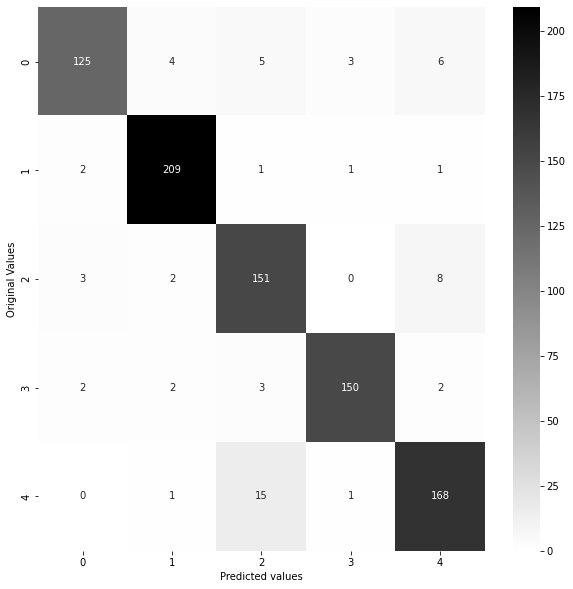

In [44]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm2,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

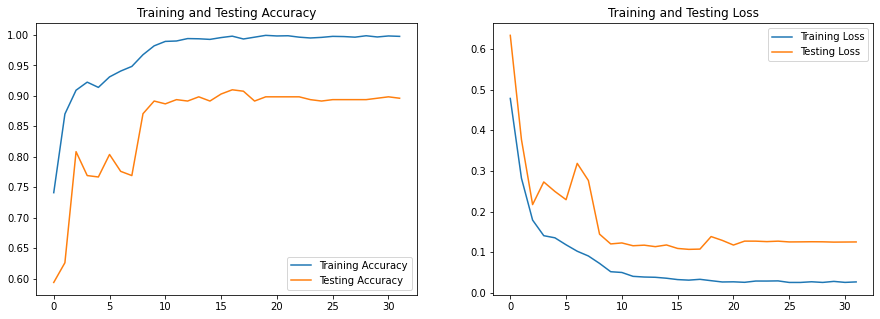

In [46]:
#to plot the accuracy chart 
acc = H.history['accuracy']
# adding the validation accuarcy 
val_acc = H.history['val_accuracy']
# ploting the loss graph
loss = H.history['loss']
 # adding the validation loss
val_loss = H.history['val_loss']
# defining range
epochs_range = range(32)
# defining the size
plt.figure(figsize=(15, 5))
# initializing the subplot
plt.subplot(1, 2, 1)
# DEFINING THE iterations 
plt.plot(epochs_range, acc, label='Training Accuracy')
# for FITTING
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
# FOR INITIALIZATION
plt.legend(loc='lower right')
# defining the title 
plt.title('Training and Testing Accuracy')
# to the subplots 
plt.subplot(1, 2, 2)
# initializing the subplot
plt.plot(epochs_range, loss, label='Training Loss')
# for simple and loss val_loss
plt.plot(epochs_range, val_loss, label='Testing Loss')
# FOR TESTING LOSS
plt.legend(loc='upper right')
# defining the title
plt.title('Training and Testing Loss')
# to print the graph
plt.show()


# **InceptionV3**

In [47]:
import keras,os
# importing basic libraries
from keras.models import Sequential
# importing basic layers 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
# importing model
from keras.models import Model
# importing optimizer
from keras import optimizers , layers, applications
# importing the inceptionnet 
from tensorflow.keras.applications import InceptionV3  #importing vgg16 model

In [48]:
#building the model
Inception_model = Sequential()
# initializing the model
base = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(255,255,3), 
    # defining the shape 
)
Inception_model.add(base)
# adding layer to squeeze the data
Inception_model.add(layers.Flatten())
# to add deep layers
Inception_model.add(layers.Dense(256, activation='relu'))
# to add another hidden layer
Inception_model.add(layers.Dense(5, activation='softmax'))
# defining the output layer

87924736/87910968 [==============================] - 0s 0us/step


In [49]:
# to debug 
Inception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
                        # INITIALIZING THE LOSS
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [50]:
Inception_model.summary() # function to show the summary

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               18874624  
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 40,678,693
Trainable params: 40,644,261
Non-trainable params: 34,432
_________________________________________________________________


In [51]:
# to import crucial library
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint # defining the callbacks 
checkpoint_path = 'models/InceptionV3/model_224.h5'
# initilaizing the callbacks 
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    # defining earlystop
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    # defining checkpoint
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

In [52]:
# to trained the algorithm
history = Inception_model.fit(Flower_X_Train,Flower_Y_Train,
          epochs =100,  # defining the epochs 
          callbacks = callbacks,
          # to add the valid database
          validation_data = (Flower_X_Val,Flower_Y_Val),
          batch_size = 32 )  # defining the batch size

Epoch 1/100
95/95 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.7045
Epoch 1: val_loss improved from inf to 0.22385, saving model to models/InceptionV3/model_224.h5
95/95 [==============================] - 47s 395ms/step - loss: 0.2828 - accuracy: 0.7045 - val_loss: 0.2238 - val_accuracy: 0.7991 - lr: 2.0000e-05
Epoch 2/100
95/95 [==============================] - ETA: 0s - loss: 0.0834 - accuracy: 0.9391
Epoch 2: val_loss improved from 0.22385 to 0.18851, saving model to models/InceptionV3/model_224.h5
95/95 [==============================] - 32s 339ms/step - loss: 0.0834 - accuracy: 0.9391 - val_loss: 0.1885 - val_accuracy: 0.8337 - lr: 2.0000e-05
Epoch 3/100
95/95 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9815
Epoch 3: val_loss improved from 0.18851 to 0.17003, saving model to models/InceptionV3/model_224.h5
95/95 [==============================] - 33s 352ms/step - loss: 0.0387 - accuracy: 0.9815 - val_loss: 0.1700 - val_accura

In [53]:
 # importing classsification report , confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# defining prediction variable of testing
pred3 = Inception_model.predict(Flower_X_Test)
# defining prediction variable of training
pred3_T = Inception_model.predict(Flower_X_Train)

In [54]:
# to show the classification report 
print(classification_report(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred3, axis=1))) # c_r
print()  # testing score
print('Testing Accuracy: ', accuracy_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred3, axis=1)))
print()  # training score
print('Training Accuracy: ', accuracy_score(np.argmax(Flower_Y_Train, axis=1), np.argmax(pred3_T, axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       143
           1       0.92      0.94      0.93       214
           2       0.87      0.88      0.88       164
           3       0.93      0.92      0.92       159
           4       0.90      0.88      0.89       185

    accuracy                           0.90       865
   macro avg       0.90      0.90      0.90       865
weighted avg       0.90      0.90      0.90       865


Testing Accuracy:  0.9017341040462428

Training Accuracy:  1.0


In [55]:
# importing some important function
from sklearn.metrics import precision_score,recall_score,f1_score
# importing crucial library
print('Precision by InceptionV3 of testing data is: %.3f' % precision_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred3, axis=1),average='micro')) 
# checking the precision value
print('Recall by InceptionV3 of testing data is: %.3f' % recall_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred3, axis=1),average='micro')) 
# checking the recall value
print('F1 score by InceptionV3  of testing data is: %.3f' % f1_score(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred3, axis=1),average='micro')) 
# checking the f2 score

Precision by InceptionV3 of testing data is: 0.902
Recall by InceptionV3 of testing data is: 0.902
F1 score by InceptionV3  of testing data is: 0.902


In [56]:
# importing cm 
from sklearn.metrics import confusion_matrix
# initializing c_M
cm3 = confusion_matrix(np.argmax(Flower_Y_Test, axis=1), np.argmax(pred3, axis=1))

Text(69.0, 0.5, 'Original Values')

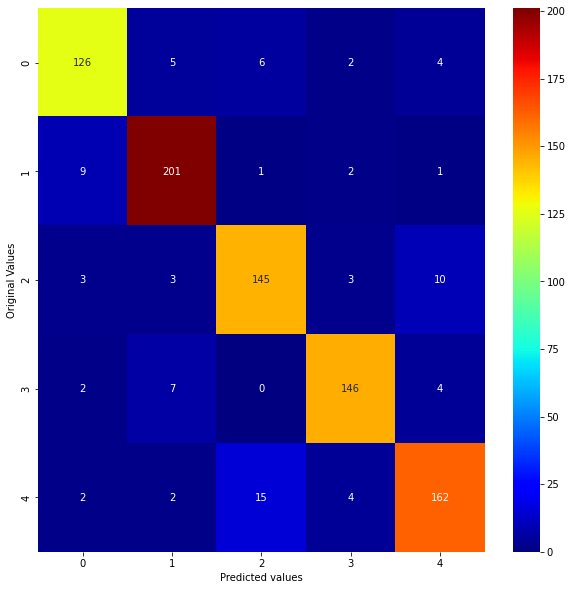

In [57]:
# plotting cm
import seaborn as sns
# assigning the shape 
plt.figure(figsize=(10,10))
# assigning heat map color
sns.heatmap(cm3,annot=True,cmap=random.choice(cmap),  fmt='d')
# defining its x-axis name 
plt.xlabel('Predicted values')
# dfining its y-axis name
plt.ylabel('Original Values')

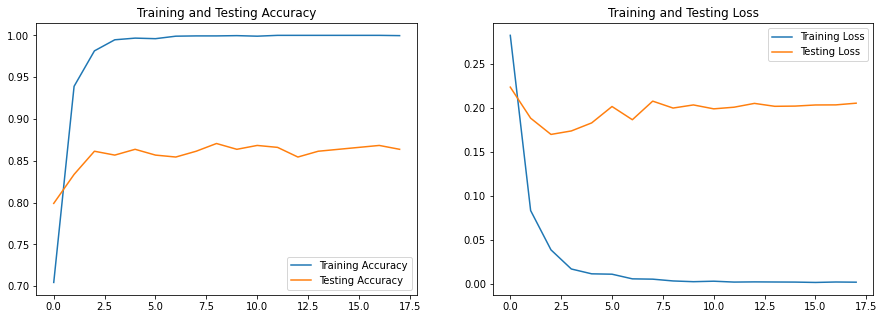

In [58]:
#to plot the accuracy chart 
acc = history.history['accuracy']
# adding validation score
val_acc = history.history['val_accuracy']
# ploting the loss graph
loss = history.history['loss']
# to add val_ loss
val_loss = history.history['val_loss']
# defining range
epochs_range = range(18)
# defining the size
plt.figure(figsize=(15, 5))
# adding subplot
plt.subplot(1, 2, 1)
# DEFINING EPOCHS SCORE
plt.plot(epochs_range, acc, label='Training Accuracy')
# defing the range of training accuracy
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
# defining the accuracy of testing data
plt.legend(loc='lower right')
# defining the title 
plt.title('Training and Testing Accuracy')
# ADDING SUBPLOT
plt.subplot(1, 2, 2)
# adding subplot 
plt.plot(epochs_range, loss, label='Training Loss')
# adding loss
plt.plot(epochs_range, val_loss, label='Testing Loss')
# EPOCHS RANGE FOR TESTING LOSS
plt.legend(loc='upper right')
# to add the title 
plt.title('Training and Testing Loss')
# to DISPLAY the graph
plt.show()
